# Apresentação
Este notebook se refere à resolução de um case do processo seletivo para a posição de Cientista de Dados Jr na empresa Zeta Dados.
A proposta era criar 8 polos de venda com 50 pontos de venda para indústria de sorvetes Gelarte na cidade de São Paulo.

# Tratamento e análise exploratória da base de dados

In [ ]:
import pandas as pd #manipulação de dados

In [ ]:
df = pd.read_excel("https://raw.githubusercontent.com/jaxrosil/zetadados/main/Base_prospeccao.xlsx") # importação da base do repositório do github
df

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede
0,118,LATICINIOS GUARANESIA ...,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,...
1,128,MAGAZINE FOTO CUPECE ...,-23.67614,-46.64258,Papelaria,Papelaria,Baixíssima,Entre R$81mil e R$360mil,...
2,173,ADORA DOCES ...,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,...
3,1110,RESTAURANTE AR LIVRE LTDA ...,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA ...
4,1119,OLIMAR ...,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,...
...,...,...,...,...,...,...,...,...,...
2246,964152,CENTERSWEET COMERCIO DE DOCES LTDA ...,-23.60083,-46.66326,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,...
2247,965100,KININHA CASA DE LANCHES LTDA ...,-23.50200,-46.62231,Bar e lanchonete,Lanchonete,Alta,Até R$81mil,...
2248,966134,PEDRO LUIZ RODRIGUES CENTENO ...,-23.53888,-46.49056,As 1-4 chks,Hortifruti,Muito alta,Entre R$81mil e R$360mil,...
2249,966148,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA...,-23.66716,-46.65593,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA...


In [ ]:
df.shape # df possui 2251 linhas e 9 colunas

(2251, 9)

In [ ]:
df.columns # nome das colunas

Index(['ID', 'Nome estabelecimento', 'Latitude', 'Longitude', 'Categoria',
       'Categoria Detalhada', 'Probabilidade de Funcionamento',
       'Faixa de Faturamento', 'Rede'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2251 non-null   int64  
 1   Nome estabelecimento            2251 non-null   object 
 2   Latitude                        2251 non-null   float64
 3   Longitude                       2251 non-null   float64
 4   Categoria                       2251 non-null   object 
 5   Categoria Detalhada             2251 non-null   object 
 6   Probabilidade de Funcionamento  2251 non-null   object 
 7   Faixa de Faturamento            2251 non-null   object 
 8   Rede                            2251 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 158.4+ KB


In [ ]:
df.nunique() # número de valores únicos por colunas

,0
ID,2251
Nome estabelecimento,2211
Latitude,1930
Longitude,1949
Categoria,68
Categoria Detalhada,71
Probabilidade de Funcionamento,6
Faixa de Faturamento,5
Rede,743


### Valores únicos por coluna

In [ ]:
df['Nome estabelecimento'].unique()

array(['LATICINIOS GUARANESIA                                                          ',
       'MAGAZINE FOTO CUPECE                                                           ',
       'ADORA DOCES                                                                    ',
       ...,
       'PEDRO LUIZ RODRIGUES CENTENO                                                   ',
       'CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA                                 ',
       'MERCEARIA PEREIRA                                                              '],
      dtype=object)

In [ ]:
df['Categoria'].unique()

array(['As 1-4 chks                ', 'Papelaria                  ',
       'Padarias e cafeterias      ', 'Restaurante          ',
       'Bar e lanchonete           ', 'Restaurante                ',
       'Padarias e cafeterias', 'Prédios                    ',
       'Cuidados com animais       ', 'As 1-4 chks          ',
       'Farmácia             ', 'Tradicional          ',
       'Casa e construção          ', 'Atacadista                 ',
       'Atacadista           ', 'Automobilísticos     ',
       'Bar e lanchonete     ', 'As 5-9 chks          ',
       'Variedades                 ', 'Tabacaria                  ',
       'Farmácia                   ', 'Saúde                      ',
       'Beleza e bem-estar         ', 'Beleza e bem-estar   ',
       'Petróleo e derivados       ', 'Tradicional                ',
       'Banca de jornais e revistas', 'Casa e construção    ',
       'As 5-9 chks                ', 'Escritório                 ',
       'Esportes             ',

In [ ]:
df['Categoria Detalhada'].unique()

array(['Mercado                                      ',
       'Papelaria                                    ',
       'Confeitaria                                  ',
       'Restaurante geral                            ',
       'Lanchonete                                   ',
       'Restaurantes típicos                         ',
       'Corporativos                                 ',
       'Cafeteria                                    ',
       'Pet shop                                     ',
       'Padaria                                      ',
       'Farmácia                                     ',
       'Loja de bebidas                              ',
       'Lojas de decoração                           ',
       'Hortifruti                                   ',
       'Bebidas                                      ',
       'Peças e acessórios                           ',
       'Restaurantes especializados                  ',
       'Supermercado                            

In [ ]:
df['Probabilidade de Funcionamento'].unique()

array(['Muito alta               ', 'Baixíssima               ',
       'Alta                     ', 'Média                    ',
       'Baixa                    ', 'Fechado                  '],
      dtype=object)

In [ ]:
df['Faixa de Faturamento'].unique()

array(['Entre R$81mil e R$360mil', 'Entre R$360mil e R$4.8MM',
       'Até R$81mil             ', 'Maior que R$10MM        ',
       'Entre R$4.8MM Até R$10MM'], dtype=object)

In [ ]:
df['Rede'].unique()

array(['                                                                               ',
       'RESTAURANTE AR LIVRE LTDA                                                      ',
       'MARSELHESA CAFE LTDA                                                           ',
       'QUALITTA CAFE & RESTAURANTE LTDA                                               ',
       'MERCADINHO PALMA LTDA                                                          ',
       'BAR E RESTAURANTE CAVALCANTE LTDA                                              ',
       'LSF CAFE EXPRESSO LTDA                                                         ',
       'CAOTRICLUB ADESTRAMENTO DE CAES LTDA                                           ',
       'NOTRE PAIN PADARIA ARTESANAL LTDA                                              ',
       'FEIRA E COZINHA PRATICA LTDA                                                   ',
       'BIO EQUILIBRIO - FARMACIA DE MANIPULACAO LTDA                                  ',
       'LI

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Nome estabelecimento', 'Categoria', 'Categoria Detalhada',
       'Probabilidade de Funcionamento', 'Faixa de Faturamento', 'Rede'],
      dtype='object')

In [ ]:
objetos = df.select_dtypes(include=['object']).columns # selecionar o nome das colunas do tipo object

In [ ]:
df[objetos] = df[objetos].apply(lambda x: x.str.strip()) # remover espacos em branco desnecessários

In [ ]:
df['Categoria Detalhada'].unique() # vendo se deu certo a remoção

array(['Mercado', 'Papelaria', 'Confeitaria', 'Restaurante geral',
       'Lanchonete', 'Restaurantes típicos', 'Corporativos', 'Cafeteria',
       'Pet shop', 'Padaria', 'Farmácia', 'Loja de bebidas',
       'Lojas de decoração', 'Hortifruti', 'Bebidas',
       'Peças e acessórios', 'Restaurantes especializados',
       'Supermercado', 'Loja de variedades', 'Tabacaria', 'Clínicas',
       'Lojas de materiais de construção', 'Salão de beleza',
       'Posto de combustível com loja de conveniência', 'Bomboniere',
       'Outros', 'Banca de jornais e revistas', 'Especializados',
       'Marketing e vendas', 'Buffets de festa', 'Alimentos geral',
       'Organizações associativas patronais', 'Perfumaria',
       'Alimentos em geral', 'Geral', 'Consultório - outros', 'Indústria',
       'Posto de combustível', 'Fotografia', '', 'Loja de conveniência',
       'Estruturas metálicas', 'Lojas de materiais elétricos',
       'Suporte técnico', 'Chocolates', 'Lojas de acabamentos',
       'Estac

In [ ]:
df.query("`Categoria Detalhada` == ''") # filtrando linha que além de não ter Categoria Detalhada, não é ponto de venda alimentício

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede
507,195159,M A F TELEVENDAS,-23.64689,-46.64494,Representantes comerciais,,Baixa,Entre R$81mil e R$360mil,


In [ ]:
df.query("`Categoria Detalhada` == ''").ID # vendo o número único desse ponto

,ID
507,195159


In [ ]:
df.query("ID == 195159")

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede
507,195159,M A F TELEVENDAS,-23.64689,-46.64494,Representantes comerciais,,Baixa,Entre R$81mil e R$360mil,


In [ ]:
indice_para_excluir = df.loc[df['ID'] == 195159].index # pegando o índice desse ponto

In [ ]:
df = df.drop(indice_para_excluir) # ponto/linha removida

In [ ]:
len(df['Categoria'].unique()) # quantidade de Categorias únicas

41

In [ ]:
len(df['Categoria Detalhada'].unique()) # quantidade de Categorias Detalhadas únicas

70

In [ ]:
df[df["Categoria Detalhada"].isnull()]

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede


A coluna Categoria Detalhada, além de ser mais específica em relação ao tipo de estabelecimento, não tem mais valores únicos. Por isso, ela vai ser usada para filtrar apenas os estabelecimentos alimentícios.

In [ ]:
categorias = pd.DataFrame(df['Categoria Detalhada'].unique()) # selecionando as Categorias Detalhas únicas

In [ ]:
categorias.to_excel("categorias.xlsx", index=False) # exportando para excel

## Filtrando a categoria alimetícia
Para fazer esse filtro, usamos três critérios:
- Avaliação manual por quem fez o código se o estabelecimento é estritamente alimetício
- Avaliação pelo Chat GPT 4-o mini se o estabelecimento é estritamente alimentício
- Avaliação pelo Chat GPT 4-o mini se o estabelecimento é potencialmente um ponto de vendas alimentício

Para decisão final, consideramos a maioria dos votos, onde 1 = alimentício e 0 = não-alimentício.

A tabela com as avaliações estão no link abaixo, bem como os prompts usados no Chat GPT:
[Avaliação Categorias Alimentícias](https://docs.google.com/spreadsheets/d/1NXQffl1fbKHwUtlo_gdRHsoHf9qmWZtgx02YKD1vPfA/edit?usp=sharing)

Uma possível melhoria para automação desse processo de categorização seria usar uma LLM de código aberto, como o deepseek r1.

Importante salientar que a existência do código CNAE dos estabelecimento facilitaria sua classificação.

In [ ]:
aux_alimenticio = pd.read_excel('https://raw.githubusercontent.com/jaxrosil/zetadados/main/Zeta%20Dados%20-%20Case%20-%20Categorias.xlsx', sheet_name='Query') # categorias classificadas

In [ ]:
aux_alimenticio

,Categoria,Alimentício,Fonte
0,Mercado,1,Manual
1,Papelaria,0,Manual
2,Confeitaria,1,Manual
3,Restaurante geral,1,Manual
4,Lanchonete,1,Manual
...,...,...,...
205,Casas noturnas,0,GPT sub
206,Consultório médico,0,GPT sub
207,Metalurgia,0,GPT sub
208,Delicatessen,1,GPT sub


In [ ]:
aux_alimenticio['Alimentício'] = aux_alimenticio['Alimentício'].astype(int) # convertendo a coluna Alimentício para inteiro

In [ ]:
aux_alimenticio.isnull().sum() # validando se a base está correta e sem dados faltantes

,0
Categoria,0
Alimentício,0
Fonte,0


In [ ]:
aux_alimenticio['Alimentício'].value_counts()

,count
Alimentício,
0,150
1,60


In [ ]:
alimenticio = aux_alimenticio.pivot_table(
    index='Categoria',
    columns='Fonte',
    values='Alimentício',
    aggfunc='first'
).reset_index() # dissolvendo a avalição de cada modelo para poder agregar pela maioria

In [ ]:
alimenticio

Fonte,Categoria,GPT obj,GPT sub,Manual
0,Alimentos em geral,1,1,1
1,Alimentos geral,1,1,1
2,Alojamento,0,0,0
3,Auxiliares,0,0,0
4,Banca de jornais e revistas,0,0,1
...,...,...,...,...
65,Supermercado,1,1,1
66,Suporte técnico,0,0,0
67,Tabacaria,0,0,0
68,Vestuário,0,0,0


In [ ]:
alimenticio.isnull().sum()

,0
Fonte,
Categoria,0
GPT obj,0
GPT sub,0
Manual,0


In [ ]:
alimenticio['Alimentício'] = (alimenticio['GPT obj'] + alimenticio['GPT sub'] + alimenticio['Manual'] >= 2).astype(int) # decidindo a categoria pela maioria
alimenticio

Fonte,Categoria,GPT obj,GPT sub,Manual,Alimentício
0,Alimentos em geral,1,1,1,1
1,Alimentos geral,1,1,1,1
2,Alojamento,0,0,0,0
3,Auxiliares,0,0,0,0
4,Banca de jornais e revistas,0,0,1,0
...,...,...,...,...,...
65,Supermercado,1,1,1,1
66,Suporte técnico,0,0,0,0
67,Tabacaria,0,0,0,0
68,Vestuário,0,0,0,0


In [ ]:
df['Alimentício'] = df['Categoria Detalhada'].map(alimenticio.set_index('Categoria')['Alimentício']) # incluindo no dataframe original a coluna Alimentício que aponta se o estabelecimento é alimentício ou não

In [ ]:
df

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1
1,128,MAGAZINE FOTO CUPECE,-23.67614,-46.64258,Papelaria,Papelaria,Baixíssima,Entre R$81mil e R$360mil,,0
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1
...,...,...,...,...,...,...,...,...,...,...
2246,964152,CENTERSWEET COMERCIO DE DOCES LTDA,-23.60083,-46.66326,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
2247,965100,KININHA CASA DE LANCHES LTDA,-23.50200,-46.62231,Bar e lanchonete,Lanchonete,Alta,Até R$81mil,,1
2248,966134,PEDRO LUIZ RODRIGUES CENTENO,-23.53888,-46.49056,As 1-4 chks,Hortifruti,Muito alta,Entre R$81mil e R$360mil,,1
2249,966148,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,-23.66716,-46.65593,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,1


In [ ]:
df['Alimentício'].isnull().sum()

0

In [ ]:
df.query("`Alimentício` == 1") # filtrando apenas os estabelecimentos alimentícios

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,Alta,Entre R$360mil e R$4.8MM,MARSELHESA CAFE LTDA,1
...,...,...,...,...,...,...,...,...,...,...
2246,964152,CENTERSWEET COMERCIO DE DOCES LTDA,-23.60083,-46.66326,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
2247,965100,KININHA CASA DE LANCHES LTDA,-23.50200,-46.62231,Bar e lanchonete,Lanchonete,Alta,Até R$81mil,,1
2248,966134,PEDRO LUIZ RODRIGUES CENTENO,-23.53888,-46.49056,As 1-4 chks,Hortifruti,Muito alta,Entre R$81mil e R$360mil,,1
2249,966148,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,-23.66716,-46.65593,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,1


In [ ]:
df = df.query("`Alimentício` == 1") # atribuindo o filtro ao df original

In [ ]:
df.head()

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,Alta,Entre R$360mil e R$4.8MM,MARSELHESA CAFE LTDA,1


In [ ]:
df.query('Rede == ""') # filtrando os estabelecimentos que são de rede

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1
7,2193,DOCE DUPLA,-23.50391,-46.64024,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$81mil e R$360mil,,1
9,3144,CAFE CAOC COMERCIO DE DOCES E SALGADOS LTDA,-23.55789,-46.67038,Padarias e cafeterias,Cafeteria,Muito alta,Entre R$360mil e R$4.8MM,,1
...,...,...,...,...,...,...,...,...,...,...
2245,963182,BOM DE CAFE COMERCIO LTDA,-23.61821,-46.67163,Padarias e cafeterias,Cafeteria,Média,Entre R$81mil e R$360mil,,1
2246,964152,CENTERSWEET COMERCIO DE DOCES LTDA,-23.60083,-46.66326,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1
2247,965100,KININHA CASA DE LANCHES LTDA,-23.50200,-46.62231,Bar e lanchonete,Lanchonete,Alta,Até R$81mil,,1
2248,966134,PEDRO LUIZ RODRIGUES CENTENO,-23.53888,-46.49056,As 1-4 chks,Hortifruti,Muito alta,Entre R$81mil e R$360mil,,1


In [ ]:
(df['Rede'] != '').astype(int) # atribuindo 0 se não é de rede e 1 se é

,Rede
0,0
2,0
3,1
4,0
5,1
...,...
2246,0
2247,0
2248,0
2249,1


In [ ]:
df['De Rede'] = (df['Rede'] != '').astype(int) # coluna nova que diz se estabelecimento é (1) ou não (0) de rede

<ipython-input-44-f40ecb931195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['De Rede'] = (df['Rede'] != '').astype(int) # coluna nova que diz se estabelecimento é (1) ou não (0) de rede


In [ ]:
df.head()

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1,0
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1,0
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1,0
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,Alta,Entre R$360mil e R$4.8MM,MARSELHESA CAFE LTDA,1,1


In [ ]:
df['Probabilidade de Funcionamento'].unique() # vendo os valores únicos da coluna Probabilidade de Funcionamento

array(['Muito alta', 'Baixíssima', 'Alta', 'Média', 'Fechado', 'Baixa'],
      dtype=object)

In [ ]:
df.query('`Probabilidade de Funcionamento` == "Fechado"') # filtrando estabelecimentos fechados

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede
35,14127,CASA DO PAO QUEIJO,-23.513263,-46.673421,Padarias e cafeterias,Padaria,Fechado,Entre R$81mil e R$360mil,CASA DO PÃO DE QUEIJO,1,1
44,18130,SPAZIO FARIA COMERCIO DE ALIMENTOS LTDA,-23.576840,-46.687710,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
106,48120,TIC'S LANCHES LTDA,-23.553400,-46.634800,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
108,48153,VITORIA REGIA,-23.681230,-46.781120,As 5-9 chks,Supermercado,Fechado,Entre R$360mil e R$4.8MM,,1,0
307,114109,MARCELO LEI LANCHES,-23.542840,-46.637520,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
418,157164,ALEX LIMA DANTAS 36506291869,-23.462400,-46.653560,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
494,192108,MADUREIRA VILA OLIMPIA LANCHONETE - EIRELI,-23.593840,-46.683900,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
565,217190,BIA DOCES,-23.829356,-46.723842,Padarias e cafeterias,Confeitaria,Fechado,Entre R$360mil e R$4.8MM,,1,0
587,227119,CANTINHO DA MAMMAPIZZA,-23.536200,-46.470440,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0
785,292101,TIA SO UNIDADE VILA RE,-23.523130,-46.513010,Bar e lanchonete,Lanchonete,Fechado,Entre R$81mil e R$360mil,,1,0


In [ ]:
df.query('`Probabilidade de Funcionamento` == "Fechado"').shape # 22 linhas serão excluídas

(22, 11)

In [ ]:
df = df.query('`Probabilidade de Funcionamento` != "Fechado"')

In [ ]:
df.head()

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,,1,0
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,,1,0
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,,1,0
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,Alta,Entre R$360mil e R$4.8MM,MARSELHESA CAFE LTDA,1,1


In [ ]:
df.shape

(1939, 11)

In [ ]:
df.to_excel("df_tratado.xlsx", index=False) # exportando a base tratada para excel

## Algumas visualizações

In [ ]:
import plotly.express as px
import plotly.graph_objects as go  # biblioteca para visualizações bonitas e interativas

In [ ]:
df['Faixa de Faturamento'].unique() # faixas de faturamento únicas

array(['Entre R$81mil e R$360mil', 'Entre R$360mil e R$4.8MM',
       'Até R$81mil', 'Maior que R$10MM', 'Entre R$4.8MM Até R$10MM'],
      dtype=object)

In [ ]:
# contando a frequência de cada Faixa de Faturamento
contagem = df["Faixa de Faturamento"].value_counts().reset_index()
contagem.columns = ["Faixa de Faturamento", "Contagem"]

In [ ]:
# rótulos simplificados
mapeamento_rotulos = {
    "Até R$81mil": "Até 81k",
    "Entre R$81mil e R$360mil": "81k - 360k",
    "Entre R$360mil e R$4.8MM": "360k - 4.8M",
    "Entre R$4.8MM Até R$10MM": "4.8M - 10M",
    "Maior que R$10MM": "Acima de 10M"
}

In [ ]:
# aplicando os rótulos encurtados
contagem["Faixa Formatada"] = contagem["Faixa de Faturamento"].map(mapeamento_rotulos)

In [ ]:
# definindo ordem correta da coluna Faixa de Faturamento
ordem_categorias = ["Até 81k", "81k - 360k", "360k - 4.8M", "4.8M - 10M", "Acima de 10M"]
contagem["Faixa Formatada"] = pd.Categorical(
    contagem["Faixa Formatada"], categories=ordem_categorias, ordered=True
)
contagem = contagem.sort_values("Faixa Formatada") # ordenando Faixa de Faturamento

In [ ]:
# paleta de cores
cores_profissionais = ["#2E86C1", "#1C2833", "#566573", "#117864", "#7D3C98"]

In [ ]:
# Gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=contagem["Faixa Formatada"],
    y=contagem["Contagem"],
    text=contagem["Contagem"],  # rótulo de dados
    textposition="outside",
    marker_color=cores_profissionais[:len(contagem)],  # aplicando cores
    textfont=dict(size=14)
))

# ajustes do layout
fig.update_layout(
    title=dict(
        text="Frequência da Faixa de Faturamento (R$)",
        x=0.5,  # centralizando título
        font=dict(family="Arial Black", size=22, color="white")  # fonte títullo
    ),
    template="plotly_dark",
    xaxis=dict(
        showticklabels=True,  # rótulos aplicados no eixo X
        tickangle=-30,  # inclinação dos rótulos
        tickfont=dict(size=12, color="white"),
        title=None  # sem título no eixo X
    ),
    yaxis=dict(showgrid=False, visible=False),  # removendo eixo Y
    margin=dict(l=40, r=40, t=60, b=120),  # ajuste n margem inferior
    width=900,  # aumenta largura para evitar cortes
    bargap=0.15
)

# mostrando gráfico
fig.show()

Observamos uma predominância de estabelecimentos que faturarão de R\$81k-R\$360k, o que vai impactar no faturamento final dos polos escolhidos.

In [ ]:
df['Probabilidade de Funcionamento'].unique() # valores únicos de Probabilidade de Funcionamento

array(['Muito alta', 'Baixíssima', 'Alta', 'Média', 'Baixa'], dtype=object)

In [ ]:
# mesmo procedimento da Faixa de Faturamento para a Probabilidade de Funcionamento
contagem = df["Probabilidade de Funcionamento"].value_counts().reset_index()
contagem.columns = ["Probabilidade de Funcionamento", "Contagem"]

ordem_categorias = ["Baixíssima", "Baixa", "Média", "Alta", "Muito alta"]
contagem["Probabilidade de Funcionamento"] = pd.Categorical(
    contagem["Probabilidade de Funcionamento"], categories=ordem_categorias, ordered=True
)
contagem = contagem.sort_values("Probabilidade de Funcionamento")
cores_profissionais = ["#E74C3C", "#F39C12", "#F4D03F", "#2ECC71", "#3498DB"]

In [ ]:
contagem

,Probabilidade de Funcionamento,Contagem
3,Baixíssima,85
4,Baixa,8
1,Média,484
2,Alta,235
0,Muito alta,1127


In [ ]:
# Gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=contagem["Probabilidade de Funcionamento"],
    y=contagem["Contagem"],
    text=contagem["Contagem"],
    textposition="outside",
    marker_color=cores_profissionais[:len(contagem)],
    textfont=dict(size=14)
))

fig.update_layout(
    title=dict(
        text="Frequência da Probabilidade de Funcionamento",
        x=0.5,
        font=dict(family="Arial Black", size=22, color="white")
    ),
    template="plotly_dark",
    xaxis=dict(
        showticklabels=True,
        tickangle=0,  # rótulos retos
        tickfont=dict(size=12, color="white"),
        title=None
    ),
    yaxis=dict(showgrid=False, visible=False),
    margin=dict(l=40, r=40, t=60, b=100),
    width=800,
    bargap=0.15
)

fig.show()


Observamos uma predominância de estabelecimentos com probabilidade alta de estar aberto, o que vai impactar no funcionamento final dos polos escolhidos.

## Label Encoder

In [ ]:
# ordenando categorias de Faixa de Faturamento
faturamento_ordem = ['Até R$81mil', 'Entre R$81mil e R$360mil', 'Entre R$360mil e R$4.8MM',
                     'Entre R$4.8MM Até R$10MM', 'Maior que R$10MM']

# ordenando cateogirias de Probabilidade de Funcionamento
probabilidade_ordem = ['Baixíssima', 'Baixa', 'Média', 'Alta', 'Muito alta']

In [ ]:
# categorias ordenadas e transformadas em inteiros
df['Faixa de Faturamento'] = pd.Categorical(df['Faixa de Faturamento'],
                                            categories=faturamento_ordem,
                                            ordered=True)
df['Faixa de Faturamento'] = df['Faixa de Faturamento'].cat.codes+1 # somando um para poder fazer cálculos futuramente

df['Probabilidade de Funcionamento'] = pd.Categorical(df['Probabilidade de Funcionamento'],
                                                      categories=probabilidade_ordem,
                                                      ordered=True)
df['Probabilidade de Funcionamento'] = df['Probabilidade de Funcionamento'].cat.codes+1

In [ ]:
# mapeamentos
print("Mapeamento Faixa de Faturamento:",
      dict(zip(faturamento_ordem, range(1,len(faturamento_ordem)+1))))
print("Mapeamento Probabilidade de Funcionamento:",
      dict(zip(probabilidade_ordem, range(1,len(probabilidade_ordem)+1))))

Mapeamento Faixa de Faturamento: {'Até R$81mil': 1, 'Entre R$81mil e R$360mil': 2, 'Entre R$360mil e R$4.8MM': 3, 'Entre R$4.8MM Até R$10MM': 4, 'Maior que R$10MM': 5}
Mapeamento Probabilidade de Funcionamento: {'Baixíssima': 1, 'Baixa': 2, 'Média': 3, 'Alta': 4, 'Muito alta': 5}


In [ ]:
df

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,5,2,,1,0
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,5,3,,1,0
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,5,1,RESTAURANTE AR LIVRE LTDA,1,1
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,1,2,,1,0
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,4,3,MARSELHESA CAFE LTDA,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2246,964152,CENTERSWEET COMERCIO DE DOCES LTDA,-23.60083,-46.66326,Padarias e cafeterias,Confeitaria,5,3,,1,0
2247,965100,KININHA CASA DE LANCHES LTDA,-23.50200,-46.62231,Bar e lanchonete,Lanchonete,4,1,,1,0
2248,966134,PEDRO LUIZ RODRIGUES CENTENO,-23.53888,-46.49056,As 1-4 chks,Hortifruti,5,2,,1,0
2249,966148,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,-23.66716,-46.65593,As 1-4 chks,Mercado,5,2,CASA RAINHA PERNAMBUCANA COM DE PROD ALIM LTDA,1,1


## Índice de Ponto de Interesse
O cálculo de Índice de Atratividade de Ponto de Interesse vai ser calculado, ao final, com os seguintes critérios:
- Maximizar a Probabilidade de Funcionamento e Faixa de Faturamento
- Bonificar os pontos de venda que são de rede
- Penalizar se o ponto de venda se localiza em local com muitos outros pontos de venda de sorvete/gelato


Observação: poderiam ser levados outros fatores em consideração como:
- União com uma base do PIB per capta na região do ponto
- Bonificação se existirem POIs que atraiam o público de sorvete/gelato na região do ponto de venda

**Cálculo:**

$$
IPOI = \frac{FF^\alpha*PF+R}{S}
$$

$IPOI$: Índice de Atratividade de Ponto de Interesse

$FF$: Faixa de Faturamento

$PF$: Probabilidade de Funcionamento

$R$: É de rede (1) ou não (0)

$S$: Quantidade de sorveterias num raio de 500m
$\alpha$: Expoente para maximização do Faturamento

In [ ]:
df["ProbXFat"]=df["Probabilidade de Funcionamento"]*(df["Faixa de Faturamento"])+df['De Rede'] # cálculo preliminar do Idx_POI

In [ ]:
df.head()

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede,ProbXFat
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,5,2,,1,0,10
2,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,5,3,,1,0,15
3,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,5,1,RESTAURANTE AR LIVRE LTDA,1,1,6
4,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,1,2,,1,0,2
5,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,4,3,MARSELHESA CAFE LTDA,1,1,13


In [ ]:
df.drop(['Nome estabelecimento', 'Categoria', 'Categoria Detalhada', 'Rede', 'Alimentício', 'Probabilidade de Funcionamento', 'Faixa de Faturamento', 'De Rede'], axis=1) # tirando colunas desnecessárias para o cálculo das distâncias

,ID,Latitude,Longitude,ProbXFat
0,118,-23.51426,-46.58802,10
2,173,-23.57103,-46.65806,15
3,1110,-23.57356,-46.68943,6
4,1119,-23.53805,-46.59960,2
5,1170,-23.59662,-46.64134,13
...,...,...,...,...
2246,964152,-23.60083,-46.66326,15
2247,965100,-23.50200,-46.62231,4
2248,966134,-23.53888,-46.49056,10
2249,966148,-23.66716,-46.65593,11


In [ ]:
df = df.drop(['Nome estabelecimento', 'Categoria', 'Categoria Detalhada', 'Rede', 'Alimentício', 'Probabilidade de Funcionamento', 'Faixa de Faturamento', 'De Rede'], axis=1)

In [ ]:
df

,ID,Latitude,Longitude,ProbXFat
0,118,-23.51426,-46.58802,10
2,173,-23.57103,-46.65806,15
3,1110,-23.57356,-46.68943,6
4,1119,-23.53805,-46.59960,2
5,1170,-23.59662,-46.64134,13
...,...,...,...,...
2246,964152,-23.60083,-46.66326,15
2247,965100,-23.50200,-46.62231,4
2248,966134,-23.53888,-46.49056,10
2249,966148,-23.66716,-46.65593,11


In [ ]:
df.to_excel('alimenticio.xlsx', index=False) # exportando base tratada para excel

# Cálculo das distâncias e do Idx_POI final

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/jaxrosil/zetadados/main/alimenticio.xlsx')

In [ ]:
df.head()

,ID,Latitude,Longitude,ProbXFat
0,118,-23.51426,-46.58802,10
1,173,-23.57103,-46.65806,15
2,1110,-23.57356,-46.68943,6
3,1119,-23.53805,-46.59960,2
4,1170,-23.59662,-46.64134,13


In [ ]:
import geopandas as gpd # biblioteca para manipulação de dados georreferenciados

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude)) # importação da base tratada

In [ ]:
gdf # visualização. Observe a coluna de geometria, que é característica de geodataframes

,ID,Latitude,Longitude,ProbXFat,geometry
0,118,-23.51426,-46.58802,10,POINT (-46.58802 -23.51426)
1,173,-23.57103,-46.65806,15,POINT (-46.65806 -23.57103)
2,1110,-23.57356,-46.68943,6,POINT (-46.68943 -23.57356)
3,1119,-23.53805,-46.59960,2,POINT (-46.5996 -23.53805)
4,1170,-23.59662,-46.64134,13,POINT (-46.64134 -23.59662)
...,...,...,...,...,...
1934,964152,-23.60083,-46.66326,15,POINT (-46.66326 -23.60083)
1935,965100,-23.50200,-46.62231,4,POINT (-46.62231 -23.502)
1936,966134,-23.53888,-46.49056,10,POINT (-46.49056 -23.53888)
1937,966148,-23.66716,-46.65593,11,POINT (-46.65593 -23.66716)


In [ ]:
gdf.columns

Index(['ID', 'Latitude', 'Longitude', 'ProbXFat', 'geometry'], dtype='object')

In [ ]:
gdf.crs # o geodataframe não está com crs (coordinate reference system) atribuído

<Axes: >

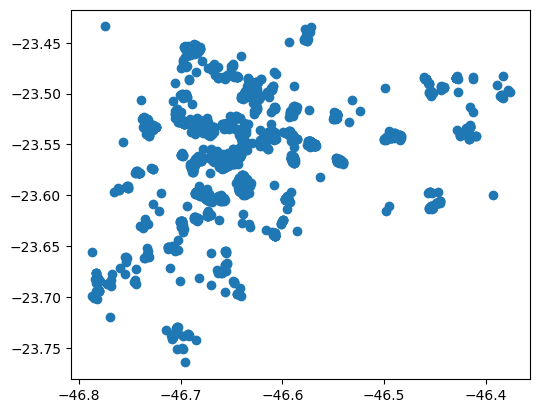

In [ ]:
gdf.plot() # plotando apenas para conferir se está tudo certo

O pacote da biblioteca osmnx trata-se de um suporte ao uso dos dados do OpenStreeMap. Esse pacote será usado para coletar a presença de estabelecimentos de venda de sorvete nos arredores dos pontos de venda, o que será utilizado no cálculo do Idx_POI

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
import osmnx as ox # pacote com suporte ao OpenStreetMap
from shapely.geometry import Point # pacote para trabalhar com geometrias

In [ ]:
# definindo o crs mais adequado para o uso do OpenStreetMap
gdf.crs = "EPSG:4326"

# cidade de interesse
cidade = "São Paulo, Brazil"

# amenity "ice_cream"
pois_ice_cream = ox.features_from_place(cidade, {"amenity": "ice_cream"})

# geodataframe para alocar a quantidade de pontos de venda se sorvete
gdf_ice_cream = gpd.GeoDataFrame(pois_ice_cream, geometry=pois_ice_cream.geometry, crs="EPSG:4326")

gdf = gdf.to_crs("EPSG:31983")
gdf_ice_cream = gdf_ice_cream.to_crs("EPSG:31983")

# raio de 500 metros
raio = 500

# contagem de pontos de venda se sorvete
def contar_pontos_vizinhos(ponto, gdf_pois):
    return gdf_pois.geometry.within(ponto.buffer(raio)).sum()

# aplicando a contagem para cada ponto do geodatframe
gdf["qtd_ice_cream"] = gdf.geometry.apply(lambda x: contar_pontos_vizinhos(x, gdf_ice_cream))

In [ ]:
gdf.head()

,ID,Latitude,Longitude,ProbXFat,geometry,qtd_ice_cream
0,118,-23.51426,-46.58802,10,POINT (337866.079 7398653.34),1
1,173,-23.57103,-46.65806,15,POINT (330786.47 7392285.822),0
2,1110,-23.57356,-46.68943,6,POINT (327587.676 7391968.231),0
3,1119,-23.53805,-46.59960,2,POINT (336712.938 7396005.786),0
4,1170,-23.59662,-46.64134,13,POINT (332525.641 7389471.665),0


In [ ]:
gdf.ProbXFat.value_counts() # observando como estão os valores para montar o cálculo do Idx_POI

,count
ProbXFat,
10,481
6,314
11,245
15,174
16,166
8,107
9,99
7,89
5,54


In [ ]:
gdf.qtd_ice_cream.value_counts() # observando como estão os valores para montar o cálculo do Idx_POI

,count
qtd_ice_cream,
0,1422
1,317
2,97
4,57
3,25
5,20
6,1


In [ ]:
gdf["Idx_POI"] = ((gdf["ProbXFat"]))/(gdf["qtd_ice_cream"]+1) # penalizando a existência de pontos de venda de sorvete no cálculo do Idx_POI

In [ ]:
gdf.head()

,ID,Latitude,Longitude,ProbXFat,geometry,qtd_ice_cream,Idx_POI
0,118,-23.51426,-46.58802,10,POINT (337866.079 7398653.34),1,5.0
1,173,-23.57103,-46.65806,15,POINT (330786.47 7392285.822),0,15.0
2,1110,-23.57356,-46.68943,6,POINT (327587.676 7391968.231),0,6.0
3,1119,-23.53805,-46.59960,2,POINT (336712.938 7396005.786),0,2.0
4,1170,-23.59662,-46.64134,13,POINT (332525.641 7389471.665),0,13.0


In [ ]:
gdf.columns

Index(['ID', 'Latitude', 'Longitude', 'ProbXFat', 'geometry', 'qtd_ice_cream',
       'Idx_POI'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler # normalização
import numpy as np # cálculos em matrizes
from scipy.spatial.distance import pdist, squareform # cálculo das distâncias
from sklearn.cluster import KMeans # clusterização

In [ ]:
# função para calcular a distância Haversine, adequada para a superfície terrestre. O valor final é dado em metros
def haversine(latlon1, latlon2):
    lat1, lon1 = np.deg2rad(latlon1)  # convertendo para radianos
    lat2, lon2 = np.deg2rad(latlon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371000  # raio da Terra em metros
    return radius * c  # distância em metros

In [ ]:
# certificando de que o geodataframe
gdf = gdf.to_crs("EPSG:4326")  # crs pra o cálculo de distâncias (em graus)

In [ ]:
# normalizando o Idx_POI
gdf['Idx_POI_normalizado'] = MinMaxScaler().fit_transform(gdf[['Idx_POI']])

In [ ]:
# matriz de coordenadas geográficas (latitude, longitude)
coordenadas = np.array([(ponto.x, ponto.y) for ponto in gdf.geometry])

In [ ]:
# matriz de distâncias usando a fórmula de Haversine
distancias = pdist(coordenadas, metric=haversine)
distancias = squareform(distancias)  # matriz quadrada

In [ ]:
# normalizando distâncias
distancias_normalizadas = MinMaxScaler().fit_transform(distancias)

Nosso objetivo ao definir os polos é maximizar o Idx_POI e minimizar a distância.
Atribuímos um peso lijeiramente maior para a distância, pois isso evita o disperdício recursos utilizados no deslocamento. Os números utilizados foram achados por tentativa e erro de forma a otimizar essas duas variáveis em questão.

In [ ]:
# minimizar distância e maximizar Idx_POI
peso_distancia = 10
peso_poi = 5
distancias_idx_poi_combinado = (peso_distancia * distancias_normalizadas) - (peso_poi * gdf['Idx_POI_normalizado'].values[:, None])

## Otimização dos polos ideais
$$
DIPOI = P_{d}*D-P_{ipoi}*IPOI^\beta
$$

$DIPOI$: Fórmula para maximizar o IPOI e minimizar a distância

$P_{d}$: Peso da distância entre os pontos de venda

$P_{ipoi}$: Peso do IPOI

$D$: distância

$IPOI$: Índice de Atratividade de Ponto de Interesse^
$\beta$: Expoente para maximização do IPO

In [ ]:
# aplicando KMeans para formar 8 polos de venda minimizando a distância
n_polos = 8
kmeans = KMeans(n_clusters=n_polos, random_state=42, n_init=10)
gdf['polo_temp'] = kmeans.fit_predict(distancias_idx_poi_combinado)

In [ ]:
gdf['polo_venda'] = -1  # inicialmente, todos os pontos são marcados como sem polo

In [ ]:
# otimização do Idx_POI
for polo in range(n_polos):
    pontos_do_polo = gdf[gdf['polo_temp'] == polo]
    if len(pontos_do_polo) > 50:
        pontos_do_polo = pontos_do_polo.nlargest(50, 'Idx_POI_normalizado')

    # atribuindo os pontos ao polo
    gdf.loc[pontos_do_polo.index, 'polo_venda'] = polo

In [ ]:
# remover a coluna temporária
gdf.drop(columns=['polo_temp'], inplace=True)
# resultado
gdf[['ID', 'polo_venda']]

,ID,polo_venda
0,118,-1
1,173,-1
2,1110,-1
3,1119,-1
4,1170,-1
...,...,...
1934,964152,-1
1935,965100,-1
1936,966134,-1
1937,966148,-1


In [ ]:
gdf.polo_venda.value_counts() # verificando se distruição dos pontos de venda foi feita corretamente

,count
polo_venda,
-1,1539
5,50
2,50
1,50
3,50
4,50
7,50
0,50
6,50


In [ ]:
gdf.head()

,ID,Latitude,Longitude,ProbXFat,geometry,qtd_ice_cream,Idx_POI,Idx_POI_normalizado,polo_venda
0,118,-23.51426,-46.58802,10,POINT (-46.58802 -23.51426),1,5.0,0.181818,-1
1,173,-23.57103,-46.65806,15,POINT (-46.65806 -23.57103),0,15.0,0.571429,-1
2,1110,-23.57356,-46.68943,6,POINT (-46.68943 -23.57356),0,6.0,0.220779,-1
3,1119,-23.53805,-46.59960,2,POINT (-46.5996 -23.53805),0,2.0,0.064935,-1
4,1170,-23.59662,-46.64134,13,POINT (-46.64134 -23.59662),0,13.0,0.493506,-1


In [ ]:
gdf.query('polo_venda == -1') # filtrando pontos de venda sem polo

,ID,Latitude,Longitude,ProbXFat,geometry,qtd_ice_cream,Idx_POI,Idx_POI_normalizado,polo_venda
0,118,-23.51426,-46.58802,10,POINT (-46.58802 -23.51426),1,5.0,0.181818,-1
1,173,-23.57103,-46.65806,15,POINT (-46.65806 -23.57103),0,15.0,0.571429,-1
2,1110,-23.57356,-46.68943,6,POINT (-46.68943 -23.57356),0,6.0,0.220779,-1
3,1119,-23.53805,-46.59960,2,POINT (-46.5996 -23.53805),0,2.0,0.064935,-1
4,1170,-23.59662,-46.64134,13,POINT (-46.64134 -23.59662),0,13.0,0.493506,-1
...,...,...,...,...,...,...,...,...,...
1934,964152,-23.60083,-46.66326,15,POINT (-46.66326 -23.60083),1,7.5,0.279221,-1
1935,965100,-23.50200,-46.62231,4,POINT (-46.62231 -23.502),0,4.0,0.142857,-1
1936,966134,-23.53888,-46.49056,10,POINT (-46.49056 -23.53888),0,10.0,0.376623,-1
1937,966148,-23.66716,-46.65593,11,POINT (-46.65593 -23.66716),0,11.0,0.415584,-1


In [ ]:
gdf = gdf.query('polo_venda != -1') # apenas os polos

In [ ]:
gdf

,ID,Latitude,Longitude,ProbXFat,geometry,qtd_ice_cream,Idx_POI,Idx_POI_normalizado,polo_venda
10,4133,-23.525263,-46.546880,9,POINT (-46.54688 -23.52526),0,9.0,0.337662,5
11,4193,-23.510504,-46.688775,20,POINT (-46.68877 -23.5105),0,20.0,0.766234,2
16,6144,-23.532390,-46.726540,11,POINT (-46.72654 -23.53239),0,11.0,0.415584,1
20,11160,-23.640240,-46.607050,15,POINT (-46.60705 -23.64024),0,15.0,0.571429,3
23,11428,-23.602380,-46.676570,16,POINT (-46.67657 -23.60238),0,16.0,0.610390,2
...,...,...,...,...,...,...,...,...,...
1910,683107,-23.737607,-46.707821,11,POINT (-46.70782 -23.73761),0,11.0,0.415584,4
1912,689086,-23.526780,-46.681000,26,POINT (-46.681 -23.52678),0,26.0,1.000000,2
1913,689195,-23.534340,-46.731610,26,POINT (-46.73161 -23.53434),0,26.0,1.000000,2
1926,742181,-23.493449,-46.440650,13,POINT (-46.44065 -23.49345),0,13.0,0.493506,0


In [ ]:
polos = gdf[['ID', 'polo_venda', 'Idx_POI', 'qtd_ice_cream']]

In [ ]:
polos.to_excel('polos.xlsx', index=False) # exportando pontos de venda

In [ ]:
aux_polos = polos.copy()

In [ ]:
aux_vendas = pd.read_excel('https://raw.githubusercontent.com/jaxrosil/zetadados/main/df_tratado.xlsx')

In [ ]:
base_final = aux_vendas.merge(aux_polos, on='ID', how='inner') # atribuindo um polo a cada ponto de venda selecionado na base original tratada

In [ ]:
base_final

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede,polo_venda,Idx_POI,qtd_ice_cream
0,4133,LSF CAFE EXPRESSO LTDA,-23.525263,-46.546880,Padarias e cafeterias,Cafeteria,Alta,Entre R$81mil e R$360mil,LSF CAFE EXPRESSO LTDA,1,1,5,9.0,0
1,4193,GOLDEN TIETE GRILL & PIZZA LTDA,-23.510504,-46.688775,Restaurante,Restaurante geral,Alta,Maior que R$10MM,NaN,1,0,2,20.0,0
2,6144,FEIRA E COZINHA PRATICA LTDA,-23.532390,-46.726540,Restaurante,Restaurante geral,Muito alta,Entre R$81mil e R$360mil,FEIRA E COZINHA PRATICA LTDA,1,1,1,11.0,0
3,11160,SHAO COMERCIO DE PRODUTOS ALIMENTICIOS LTDA,-23.640240,-46.607050,As 1-4 chks,Mercado,Muito alta,Entre R$360mil e R$4.8MM,NaN,1,0,3,15.0,0
4,11428,THE MAGIC NUTS COMERCIAL LTDA,-23.602380,-46.676570,As 1-4 chks,Mercado,Muito alta,Entre R$360mil e R$4.8MM,THE MAGIC NUTS COMERCIAL LTDA,1,1,2,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,683107,ROTISSERIE QUIRINO LTDA,-23.737607,-46.707821,Tradicional,Bomboniere,Muito alta,Entre R$81mil e R$360mil,ROTISSERIE QUIRINO LTDA,1,1,4,11.0,0
396,689086,SUGAR CUBES COMERCIO DE DOCES LTDA,-23.526780,-46.681000,Padarias e cafeterias,Confeitaria,Muito alta,Maior que R$10MM,SUGAR CUBES COMERCIO DE DOCES LTDA,1,1,2,26.0,0
397,689195,CUBOS DE ACUCAR,-23.534340,-46.731610,Padarias e cafeterias,Confeitaria,Muito alta,Maior que R$10MM,SUGAR CUBES COMERCIO DE DOCES LTDA,1,1,2,26.0,0
398,742181,MERCEARIA GURUPI LTDA,-23.493449,-46.440650,As 1-4 chks,Mercado,Alta,Entre R$360mil e R$4.8MM,MERCEARIA GURUPI LTDA,1,1,0,13.0,0


In [ ]:
base_final.polo_venda.value_counts() # 8 polos com 50 pontos de venda

,count
polo_venda,
5,50
2,50
1,50
3,50
4,50
7,50
0,50
6,50


## Exibição dos Polos

In [ ]:
import plotly.graph_objects as go # concatenação de gráficos

In [ ]:
# paleta de coles
cores_polos = [
    'rgb(255, 99, 132)',  # cor para polo 0
    'rgb(54, 162, 235)',  # cor para polo 1
    'rgb(255, 206, 86)',  # cor para polo 2
    'rgb(75, 192, 192)',  # cor para polo 3
    'rgb(153, 102, 255)', # cor para polo 4
    'rgb(255, 159, 64)',  # cor para polo 5
    'rgb(0, 204, 255)',   # cor para polo 6
    'rgb(204, 0, 204)'    # cor para polo 7
]

In [ ]:
# criando a figura
fig = go.Figure()

# camada de polos de venda (base_final)
fig.add_trace(go.Scattermapbox(
    lat=base_final['Latitude'],
    lon=base_final['Longitude'],
    mode='markers',
    marker=dict(
        size=8,
        color=[cores_polos[int(polo)] for polo in base_final['polo_venda']],  # cor do ponto de venda com base no polo
        opacity=0.7
    ),
    text=base_final['polo_venda'].astype(str),  # tooltip
    hoverinfo='text',  # mostrar tooltip
    name='Pontos de Venda Gelarte',
))

# legenda
for i, cor in enumerate(cores_polos):
    fig.add_trace(go.Scattermapbox(
        lat=[None],  # não exibir pontos no gráfico
        lon=[None],
        mode='markers',
        marker=dict(size=10, color=cor),
        name=f'Polo {i}',  # nome do polo para a legenda
        showlegend=True  # garantindo que o item apareça na legenda
    ))

# ajuste layout
fig.update_layout(
    mapbox_style="carto-positron",  # estilo do mapa
    mapbox_zoom=11,  # Zoom da cidade de São Paulo
    mapbox_center={"lat": -23.5505, "lon": -46.6333},  # coordenadas de São Paulo
    title="Polos de venda da Gelarte na cidade de São Paulo",
    title_x=0.5,  # Centralizar o título
    title_font=dict(size=24, color='black'),  # título em preto
    template="plotly",  # modo diurno
    margin={"r":0,"t":30,"l":0,"b":0},  # margens do gráfico
    legend_title="Polos de Venda",  # título da legenda
    legend=dict(
        orientation='v',  # legenda vertical
        x=1.05,  # legenda à direita
        y=0.5,  # centralizando legenda verticalmente verticalmente
        xanchor='left',  # à esquerda
        yanchor='middle'  # ao centro
    ),
    showlegend=True  # mostrar legenda
)

# exibição
fig.show()

# Sumarizações

In [ ]:
# ordenação Faixa de Faturamento
faturamento_ordem = ['Até R$81mil', 'Entre R$81mil e R$360mil', 'Entre R$360mil e R$4.8MM',
                     'Entre R$4.8MM Até R$10MM', 'Maior que R$10MM']

# ordenação Probabilidade de Funcionamento
probabilidade_ordem = ['Baixíssima', 'Baixa', 'Média', 'Alta', 'Muito alta']

In [ ]:
# label encoding de Faixa de Faturamento e Probabilidade de Funcionamento
base_final['FatMed'] = pd.Categorical(base_final['Faixa de Faturamento'],
                                            categories=faturamento_ordem,
                                            ordered=True)
base_final['FatMed'] = base_final['FatMed'].cat.codes+1
base_final['FuncMed'] = pd.Categorical(base_final['Probabilidade de Funcionamento'],
                                                      categories=probabilidade_ordem,
                                                      ordered=True)
base_final['FuncMed'] = base_final['FuncMed'].cat.codes+1

In [ ]:
# média global de Faixa de Faturamento e Probabilidade de Funcionamento nos polos criados
(base_final['FatMed'].mean(), base_final['FuncMed'].mean())

(2.66, 4.76)

Médias dentre todos os polos:
- Faturamento: Entre R\$ 87 k e R$ 4.8 MM
- Funcionamento: Entre Alta e Muito Alta

In [ ]:
base_final['FatMed'] = pd.Categorical(base_final['Faixa de Faturamento'],
                                            categories=faturamento_ordem,
                                            ordered=True)
base_final['FatMed'] = base_final['FatMed'].cat.codes+1
base_final['FuncMed'] = pd.Categorical(base_final['Probabilidade de Funcionamento'],
                                                      categories=probabilidade_ordem,
                                                      ordered=True)
base_final['FuncMed'] = base_final['FuncMed'].cat.codes+1

In [ ]:
# média por polo
media_polos = base_final.groupby('polo_venda')[['FatMed', 'FuncMed']].mean().reset_index()
media_polos

,polo_venda,FatMed,FuncMed
0,0,2.86,4.84
1,1,2.80,4.78
2,2,3.58,4.96
3,3,3.06,4.96
4,4,2.36,4.94
5,5,2.20,4.70
6,6,2.22,4.58
7,7,2.20,4.32


In [ ]:
# atribuindo médio por polo às colunas FatMed e FuncMed
base_final['FatMed'] = base_final.groupby('polo_venda')['FatMed'].transform('mean')
base_final['FuncMed'] = base_final.groupby('polo_venda')['FuncMed'].transform('mean')

In [ ]:
base_final.FatMed.value_counts()

,count
FatMed,
2.20,100
3.58,50
2.80,50
3.06,50
2.36,50
2.86,50
2.22,50


In [ ]:
base_final.FuncMed.value_counts()

,count
FuncMed,
4.96,100
4.70,50
4.78,50
4.94,50
4.32,50
4.84,50
4.58,50


In [ ]:
base_final['De Rede'].sum()

166

Dentre os polos, há 166 pontos de venda de rede.

In [ ]:
base_final.groupby('polo_venda')[['De Rede']].sum() # número de pontos de venda de rede por polo

,De Rede
polo_venda,
0,15
1,27
2,39
3,29
4,14
5,22
6,11
7,9


In [ ]:
aux_vendas.shape

(1939, 11)

In [ ]:
aux_vendas.head()

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede
0,118,LATICINIOS GUARANESIA,-23.51426,-46.58802,As 1-4 chks,Mercado,Muito alta,Entre R$81mil e R$360mil,NaN,1,0
1,173,ADORA DOCES,-23.57103,-46.65806,Padarias e cafeterias,Confeitaria,Muito alta,Entre R$360mil e R$4.8MM,NaN,1,0
2,1110,RESTAURANTE AR LIVRE LTDA,-23.57356,-46.68943,Restaurante,Restaurante geral,Muito alta,Até R$81mil,RESTAURANTE AR LIVRE LTDA,1,1
3,1119,OLIMAR,-23.53805,-46.59960,Bar e lanchonete,Lanchonete,Baixíssima,Entre R$81mil e R$360mil,NaN,1,0
4,1170,MARSELHESA CAFE,-23.59662,-46.64134,Restaurante,Restaurante geral,Alta,Entre R$360mil e R$4.8MM,MARSELHESA CAFE LTDA,1,1


In [ ]:
aux_vendas['De Rede'].sum()

695

In [ ]:
aux_vendas['FatMed'] = pd.Categorical(aux_vendas['Faixa de Faturamento'],
                                            categories=faturamento_ordem,
                                            ordered=True)
aux_vendas['FatMed'] = aux_vendas['FatMed'].cat.codes+1
aux_vendas['FuncMed'] = pd.Categorical(aux_vendas['Probabilidade de Funcionamento'],
                                                      categories=probabilidade_ordem,
                                                      ordered=True)
aux_vendas['FuncMed'] = aux_vendas['FuncMed'].cat.codes+1
aux_vendas['FatMed'] = aux_vendas['FatMed'].mean()
aux_vendas['FuncMed'] = aux_vendas['FuncMed'].mean()

In [ ]:
(aux_vendas['FatMed'][0], aux_vendas['FuncMed'][0])

(2.2496132026817945, 4.1918514698298095)

A base original tratada e filtrada para estabelecimentos alimentícios, tem as seguintes sumarizações:
- 695 estabelecimentos de rede
- Média de estabelecimentos entre R\$81 k R\$4,8 MM de faturamento
- Média de funcionamento entre Alta e Multo Alta

## Sumarização das distâncias

In [ ]:
# criando uma coluna de geometria na base final
base_final["geometry"] = base_final.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

# convertendo em geodataframe
base_final = gpd.GeoDataFrame(base_final, geometry="geometry", crs="EPSG:4326")  # WGS 84

In [ ]:
# lista para armazenar a distância média por polo
distancias_medias = []

# interação por polo
for polo, grupo in base_final.groupby("polo_venda"):
    if len(grupo) > 1:  # se houver mais de um ponto
        coordenadas = np.array([(p.y, p.x) for p in grupo.geometry])  # (lat, lon)
        # distância de haversine
        distancias = pdist(coordenadas, metric=haversine)

        # distância média
        distancia_media = np.mean(distancias)
    else:
        distancia_media = 0  # se houver só um ponto, distância média é 0

    # adicionar dicionário à lista auxiliar criada
    distancias_medias.append({"polo_venda": polo, "distancia_media": distancia_media})

# dataframe com as distâncias médias
df_distancias_medias = pd.DataFrame(distancias_medias)

In [ ]:
# resultados
df_distancias_medias

,polo_venda,distancia_media
0,0,6498.900560
1,1,7796.629390
2,2,7701.621844
3,3,5646.989260
4,4,7156.573003
5,5,6255.217900
6,6,6167.781361
7,7,4078.221707


In [ ]:
# mapeando a distância média para cada polo na base_final
base_final['distancia_media_polo'] = base_final['polo_venda'].map(df_distancias_medias.set_index('polo_venda')['distancia_media'])

In [ ]:
base_final

,ID,Nome estabelecimento,Latitude,Longitude,Categoria,Categoria Detalhada,Probabilidade de Funcionamento,Faixa de Faturamento,Rede,Alimentício,De Rede,polo_venda,Idx_POI,qtd_ice_cream,FatMed,FuncMed,geometry,distancia_media_polo
0,4133,LSF CAFE EXPRESSO LTDA,-23.525263,-46.546880,Padarias e cafeterias,Cafeteria,Alta,Entre R$81mil e R$360mil,LSF CAFE EXPRESSO LTDA,1,1,5,9.0,0,2.20,4.70,POINT (-46.54688 -23.52526),6255.217900
1,4193,GOLDEN TIETE GRILL & PIZZA LTDA,-23.510504,-46.688775,Restaurante,Restaurante geral,Alta,Maior que R$10MM,NaN,1,0,2,20.0,0,3.58,4.96,POINT (-46.68877 -23.5105),7701.621844
2,6144,FEIRA E COZINHA PRATICA LTDA,-23.532390,-46.726540,Restaurante,Restaurante geral,Muito alta,Entre R$81mil e R$360mil,FEIRA E COZINHA PRATICA LTDA,1,1,1,11.0,0,2.80,4.78,POINT (-46.72654 -23.53239),7796.629390
3,11160,SHAO COMERCIO DE PRODUTOS ALIMENTICIOS LTDA,-23.640240,-46.607050,As 1-4 chks,Mercado,Muito alta,Entre R$360mil e R$4.8MM,NaN,1,0,3,15.0,0,3.06,4.96,POINT (-46.60705 -23.64024),5646.989260
4,11428,THE MAGIC NUTS COMERCIAL LTDA,-23.602380,-46.676570,As 1-4 chks,Mercado,Muito alta,Entre R$360mil e R$4.8MM,THE MAGIC NUTS COMERCIAL LTDA,1,1,2,16.0,0,3.58,4.96,POINT (-46.67657 -23.60238),7701.621844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,683107,ROTISSERIE QUIRINO LTDA,-23.737607,-46.707821,Tradicional,Bomboniere,Muito alta,Entre R$81mil e R$360mil,ROTISSERIE QUIRINO LTDA,1,1,4,11.0,0,2.36,4.94,POINT (-46.70782 -23.73761),7156.573003
396,689086,SUGAR CUBES COMERCIO DE DOCES LTDA,-23.526780,-46.681000,Padarias e cafeterias,Confeitaria,Muito alta,Maior que R$10MM,SUGAR CUBES COMERCIO DE DOCES LTDA,1,1,2,26.0,0,3.58,4.96,POINT (-46.681 -23.52678),7701.621844
397,689195,CUBOS DE ACUCAR,-23.534340,-46.731610,Padarias e cafeterias,Confeitaria,Muito alta,Maior que R$10MM,SUGAR CUBES COMERCIO DE DOCES LTDA,1,1,2,26.0,0,3.58,4.96,POINT (-46.73161 -23.53434),7701.621844
398,742181,MERCEARIA GURUPI LTDA,-23.493449,-46.440650,As 1-4 chks,Mercado,Alta,Entre R$360mil e R$4.8MM,MERCEARIA GURUPI LTDA,1,1,0,13.0,0,2.86,4.84,POINT (-46.44065 -23.49345),6498.900560


In [ ]:
base_final.drop(columns=['geometry']).distancia_media_polo.value_counts()

,count
distancia_media_polo,
6255.217900,50
7701.621844,50
7796.629390,50
5646.989260,50
7156.573003,50
4078.221707,50
6498.900560,50
6167.781361,50


As distâncias médias nos polos estão equilibradas entre si.

In [ ]:
# geometria a partir das Latitude e Longitude
geometry = [Point(xy) for xy in zip(aux_vendas['Longitude'], aux_vendas['Latitude'])]
gdf_vendas = gpd.GeoDataFrame(aux_vendas, geometry=geometry)

# garantindo que há crs
gdf_vendas.set_crs('EPSG:4326', allow_override=True, inplace=True)

# crs para cálculo de distâncias em metros
gdf_vendas = gdf_vendas.to_crs(epsg=3395)

# matriz de distâncias entre todos os pontos
distancias = gdf_vendas.geometry.apply(lambda x: gdf_vendas.geometry.distance(x))

#distânci média
distancias_média = distancias[distancias > 0].mean().mean()

# distância média global
print(f"{distancias_média:.2f} metros")

13187.03 metros


A distância média entre todos os pontos de venda do dataframe original tratado e filtrado apenas para vendas alimentícias é de 13.187,03 metros.

## Sumarização de Idx_POI

In [ ]:
base_final.groupby(['polo_venda'])[['Idx_POI']].mean()

,Idx_POI
polo_venda,
0,14.04
1,13.76
2,18.50
3,15.68
4,11.90
5,10.62
6,9.96
7,9.52


In [ ]:
base_final.to_excel('base_final.xlsx', index=False) # exportar base final para excel

# Considerações finais
A análise apresentada aqui não é exaustiva. Ela poderia se beneficiar do perfil de consumidores de sorvete/gelato, de características censitárias de cada ponto de venda, dentre outros fatores de análise de mercado.

O esforço maior foi em utilizar da forma mais ortodoxa possível as variáveis apresentadas, almejando uma visão compreensível dos fatores que influenciam a boa performance da instalação dos polos de vendas.

Levaram-se em consideração a faixa de faturamento, a probabilidade de funcionamento, o pertencimento a uma rede de estabelecimentos, a existência de concorrentes diretos nos arredores e as distâncias entre cada ponto de venda.

As visualizações e as sumarizações mostraram que a metologia usada, mesmo diante da limitação de variáveis, é satisfatória.

Por fim, uma apresentação dos resultados permitirá maiores análises tanto da metodologia quanto de sugestões de melhorias.

# Observações

Numa tentativa de maximizar o faturamento, foi feito um teste de hiperparâmetros em um notebook no link que se segue: [Hiperparâmetros](https://colab.research.google.com/drive/1gbkPsQcBBg1tyKGF49Qxz6NiepwjxWZE?usp=sharing)
Não conseguimos aperfeiçoar o código de modo a gerar 8 polos com exatamente 50 pontos de venda, mas mantivemos o registro para fins de aperfeiçoamento futuro.